In [1]:
import cv2
from operator import itemgetter
from detectors import Morph, HED
from lib.utils import plt_imshow, find_contours, draw_contours
from lib.NavyServiceUniformChecker import NavyServiceUniformChecker
from lib.FullDressUniformChecker import FullDressUniformChecker
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

# # plt.rc('font', family='D2coding')
# font_path = "/config/.local/share/fonts/D2Coding/D2CodingBold-Ver1.3.2-20180524.ttf"
# font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

OCR loaded!


(811, 1440, 3)
[RCF] loading...
[RCF] finished loading (0.0449 sec)
시작시간 : 2022-09-21 14:48:35.798821
종료시간 : 2022-09-21 14:48:36.060306
수행시간 : 0 초



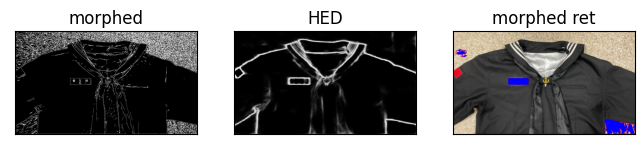

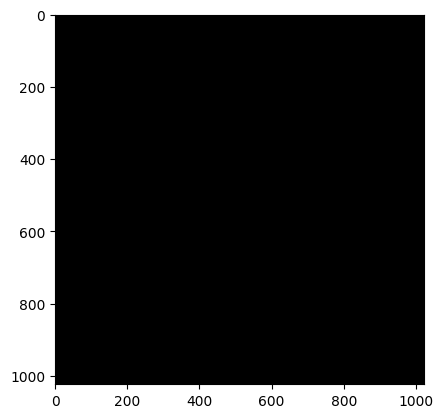

In [2]:
# full_dress_uniform, navy_service_uniform
# org_img = cv2.imread('image/navy_service_uniform/2.jpg', cv2.IMREAD_COLOR)
org_img = cv2.imread('image/full_dress_uniform/2.jpg', cv2.IMREAD_COLOR)

print(org_img.shape)
# load Engine
morph_engine, HED_engine = Morph(), HED()

# get edge image
morphed_edge, ret = morph_engine.detect_edge(org_img)
hed_edge = HED_engine.detect_edge(org_img, 500, 500)
_, mixed = morph_engine.detect_edge(hed_edge, isEdge=True)

cv2.imwrite('./res/res01.jpg', morphed_edge)
cv2.imwrite('./res/res02.jpg', hed_edge)
cv2.imwrite('./res/res03.jpg', ret)
# show
plt_imshow(["morphed", "HED", "morphed ret"], [morphed_edge, hed_edge, ret])

mixed = cv2.resize(mixed, dsize=(1024, 1024), interpolation=cv2.INTER_LINEAR)
plt.imshow(mixed)
# plt_imshow(["morphed", "HED", "morphed ret", "mixed"], [morphed_edge, hed_edge, ret, mixed])

In [ ]:
# checker = NavyServiceUniformChecker()
checker = FullDressUniformChecker()
component_dic, contour_dic = checker.checkUniform(org_img)
print(component_dic)
# print(contour_dic)

# checkFullDressUniform(org_img)

In [ ]:
from lib.model import OmilZomil
import cv2

org_img1 = cv2.imread('image/full_dress_uniform/2.jpg', cv2.IMREAD_COLOR)
org_img2 = cv2.imread('image/militery_uniform/1.jpeg', cv2.IMREAD_COLOR)
org_img3 = cv2.imread('image/navy_service_uniform/5.jpg', cv2.IMREAD_COLOR)

model = OmilZomil()
model.detect(org_img1)
model.detect(org_img2)
model.detect(org_img3)